# Prediction using Unsupervised Learning

# Siddhant Suhas Mhaske

# Data Science and Business Analytics Intern

# Step 1: Import all necessary Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

# Step 2:Read the Dataset

In [2]:
#url="https://bit.ly/3kXTdox"
data=pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Step 3: Discover and Visulaize the Data set to gain the insight

In [3]:
data.shape

(150, 6)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Since Id-column is not necessary we can drop it

data=data.drop(['Id'],axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Data Visulization

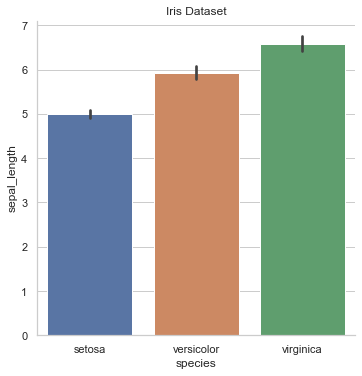

In [9]:
sns.set_theme(style="whitegrid")
iris_data=sns.load_dataset('iris')
i_data=sns.catplot(data=iris_data,kind="bar",x="species",y="sepal_length")
plt.title("Iris Dataset")
plt.show()

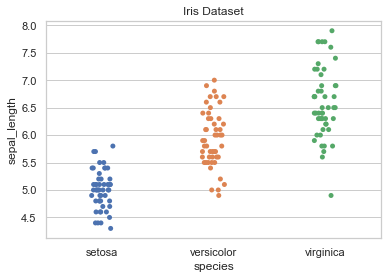

In [10]:
sns.set_theme(style="whitegrid")
iris_data = sns.load_dataset('iris')
sns.stripplot(data=iris_data,x="species",y="sepal_length" )
plt.title("Iris Dataset")
plt.show()

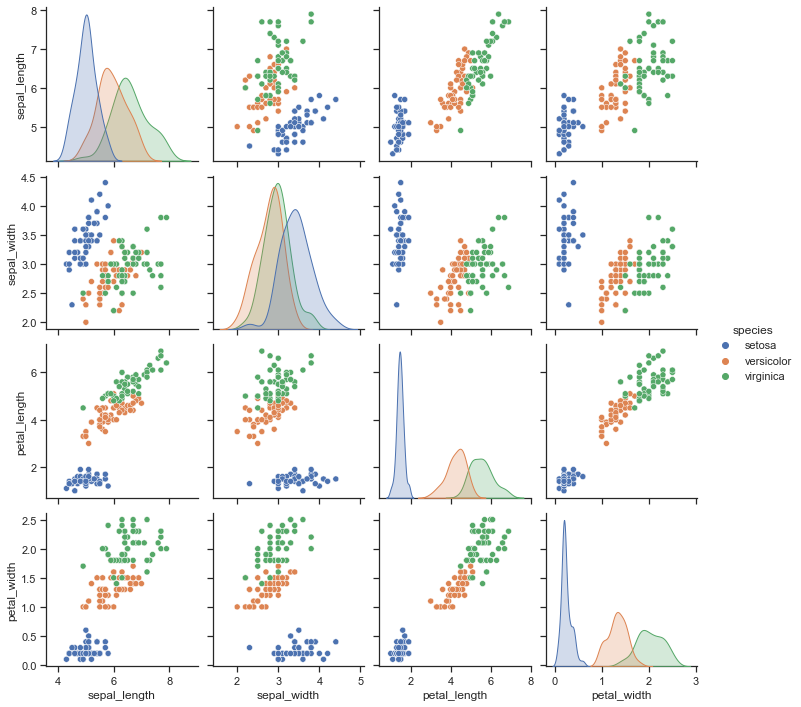

In [12]:
sns.set_theme(style="ticks")
iris_data=sns.load_dataset('iris')
sns.pairplot(iris_data, hue="species")

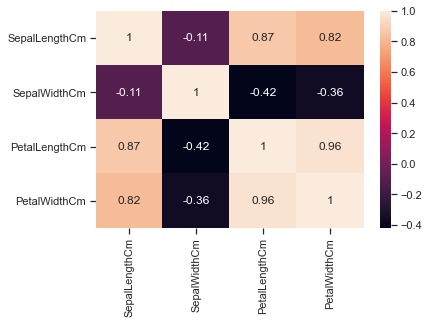

In [13]:
sns.heatmap(data.corr(),annot=True)

# Step 4:Finding optimum number of clusters using K-means clustering (Elbow Method)

In [17]:
x= data.iloc[:,[0,2]].values

wcss=[]
#with in cluster sum of squares
#WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum.

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++' , max_iter = 300 , n_init=10,random_state=0)
    kmeans.fit(x)
    
 # appending the WCSS to the list (kmeans.inertia_ returns WCSS value for an initializeed cluster)
    wcss.append(kmeans.inertia_)
    print("k : ", "WCSS : ", kmeans.inertia_)

k :  WCSS :  566.0320666666667
k :  WCSS :  112.9626273148148
k :  WCSS :  53.80135119312653
k :  WCSS :  34.3144207792208
k :  WCSS :  25.63146450956451
k :  WCSS :  21.972121094591685
k :  WCSS :  18.363797135772778
k :  WCSS :  15.200959956709955
k :  WCSS :  13.392435559006216
k :  WCSS :  11.709795011793139


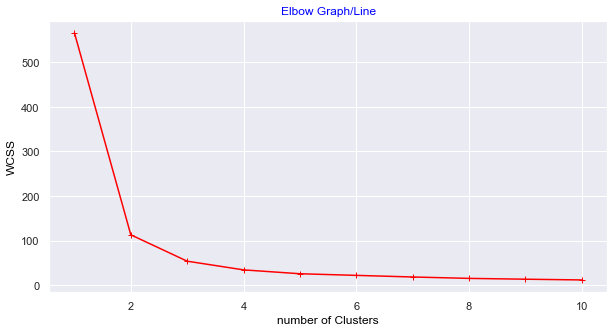

In [42]:
#plotting a line graph for visualizing the cluster

plt.plot(range(1,11),wcss,"b+-",color="red")
plt.title("Elbow Graph/Line",color="blue")
plt.xlabel("number of Clusters",color="black")
plt.ylabel("WCSS",color="black")
plt.show()
sns.set(rc={'figure.figsize' : (10,10)})

# The Optimum numbers of clusters is where the elbow occurs


# From the above graph , we considered the number of clusters as 3

In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(x)

# Visualizing Clusters

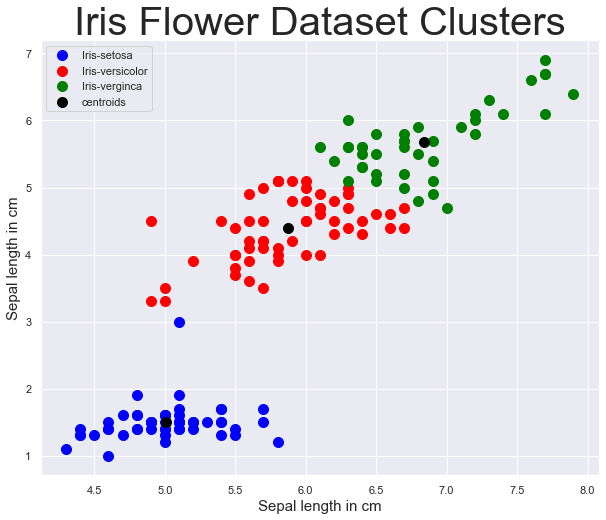

In [39]:
plt.figure(figsize=(10,8))

plt.scatter(x[y_kmeans ==0,0],x[y_kmeans ==0,1], s=100,c="Blue",label="Iris-setosa")
plt.scatter(x[y_kmeans ==1,0],x[y_kmeans ==1,1], s=100,c="Red",label="Iris-versicolor")
plt.scatter(x[y_kmeans ==2,0],x[y_kmeans ==2,1], s=100,c="Green",label="Iris-verginca")

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=100,c="black" , label="centroids")

plt.legend(loc="best")
plt.title("Iris Flower Dataset Clusters", fontsize=40)
plt.xlabel("Sepal length in cm", fontsize=15)
plt.ylabel("Sepal length in cm", fontsize=15)
plt.show()